In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
USdata = pd.read_csv('../data/USdata_zip_states_combined_cleaned.csv')

In [19]:
#combine with this? then filter for just states I downloaded data from
USdata_camgrounds_zip_states_combined = pd.read_csv('../data/USdata_est_campgrounds_zip_states_combined.csv')
USdata_camgrounds_zip_states_combined = USdata_camgrounds_zip_states_combined[USdata_camgrounds_zip_states_combined['State'] != '']
USdata_camgrounds_zip_states_combined = USdata_camgrounds_zip_states_combined.drop('Unnamed: 0', axis=1)
USdata_camgrounds_zip_states_combined = USdata_camgrounds_zip_states_combined.drop(43)

In [20]:
USdata_camgrounds_zip_states_combined = USdata_camgrounds_zip_states_combined[~pd.isna(USdata_camgrounds_zip_states_combined['State'])]

In [22]:
# USdata_camgrounds_zip_states_combined.to_csv('../data/USdata_est_campgrounds_zip_states_combined_cleaned.csv')

In [23]:
list(USdata_camgrounds_zip_states_combined['Category'].unique())

['Established Campground']

In [20]:
USdata_camgrounds_zip_states_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3740 entries, 0 to 3818
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   946 non-null    object 
 1   Name                       3740 non-null   object 
 2   Category                   3740 non-null   object 
 3   Description                3739 non-null   object 
 4   Latitude                   3740 non-null   object 
 5   Longitude                  3740 non-null   object 
 6   Altitude                   3644 non-null   object 
 7   Date verified              3740 non-null   object 
 8   Open                       3740 non-null   object 
 9   Electricity                3740 non-null   object 
 10  Wifi                       3740 non-null   object 
 11  Kitchen                    3740 non-null   object 
 12  Parking                    0 non-null      object 
 13  Restaurant                 3740 non-null   objec

In [22]:
names = ['CO', 'CA', 'AZ', 'OR', 'UT', 'WA']

In [30]:
to_combine = [USdata_camgrounds_zip_states_combined, USdata]

In [31]:
# combine
USdata_with_est_campgrounds = pd.concat(to_combine)

In [32]:
USdata_with_est_campgrounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12412 entries, 0 to 8671
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   2241 non-null   object 
 1   Name                       12412 non-null  object 
 2   Category                   12412 non-null  object 
 3   Description                12411 non-null  object 
 4   Latitude                   12412 non-null  object 
 5   Longitude                  12412 non-null  object 
 6   Altitude                   12103 non-null  object 
 7   Date verified              12412 non-null  object 
 8   Open                       12412 non-null  object 
 9   Electricity                11609 non-null  object 
 10  Wifi                       11609 non-null  object 
 11  Kitchen                    11609 non-null  object 
 12  Parking                    0 non-null      object 
 13  Restaurant                 11609 non-null  obje

In [33]:
USdata_with_est_campgrounds.head()

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center,zip_code,State
0,"Borrego Salton Seaway, Borrego Springs, CA 920...",Arroyo Salado Camping,Established Campground,"Free with two vault toilets, nothing else exis...",33.280188,-116.14578799999998,0.0,2020-02-16 14:20:45 UTC,Yes,No,No,No,NaN,No,No,No,Pit Toilets,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA
1,"Stateline Campground Rd, Kanab, UT 84741, USA",State Line Campground,Established Campground,Cute free BLM camping in near TH baths.,37.001290000000004,-112.03558799999999,0.0,2019-09-29 09:53:41 UTC,Yes,No,No,No,NaN,No,No,No,Pit Toilets,No,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UT
2,"Glenn Hwy, Glennallen, AK 99588, USA",Tolsona River RV Park and Campground,Established Campground,An old standby for us. Multiple sites for lar...,62.09536800000001,-145.980492,0.0,2016-05-27 11:38:27 UTC,Yes,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK
3,"Beverly Beach State Park, Newport, OR 97365, USA",Beverly Beach State Park,Established Campground,This is a great beach for a first night on the...,44.728808,-124.05551399999999,0.0,2020-02-07 00:00:00 UTC,Yes,Yes - At Sites,No,No,NaN,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OR
4,"Cottell Ln, Coos Bay, OR 97420, USA",Sunset Bay State Park,Established Campground,"Another night, another campground. Full hooku...",43.330797,-124.370728,2.66557884216309,2020-06-27 00:00:00 UTC,Yes,Yes - At Sites,No,No,NaN,No,Hot,Potable,Running Water,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OR


In [34]:
USdata_with_est_campgrounds_some_states = USdata_with_est_campgrounds[USdata_with_est_campgrounds['State'].isin(names)]

In [35]:
USdata_with_est_campgrounds_some_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5364 entries, 0 to 8671
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   1078 non-null   object 
 1   Name                       5364 non-null   object 
 2   Category                   5364 non-null   object 
 3   Description                5363 non-null   object 
 4   Latitude                   5364 non-null   object 
 5   Longitude                  5364 non-null   object 
 6   Altitude                   5276 non-null   object 
 7   Date verified              5364 non-null   object 
 8   Open                       5364 non-null   object 
 9   Electricity                4945 non-null   object 
 10  Wifi                       4945 non-null   object 
 11  Kitchen                    4945 non-null   object 
 12  Parking                    0 non-null      object 
 13  Restaurant                 4945 non-null   objec

In [42]:
# calc categories
USdata_with_est_campgrounds_some_states.loc[:,['Category', 'Description']].groupby(['Category']).agg('count')

,Description
Category,
Eco-Friendly,16
Established Campground,1408
Informal Campsite,887
Short-term Parking,11
Showers,139
Water,253
Wild Camping,2649


In [41]:
# calc state totals
USdata_with_est_campgrounds_some_states.loc[:,['State', 'Description']].groupby(['State']).agg('count')

,Description
State,
AZ,886
CA,1698
CO,707
OR,729
UT,651
WA,692


In [56]:
cat_counts = USdata_with_est_campgrounds_some_states.loc[:,['Category', 'Description']].groupby(['Category']).agg(
    description_count = ('Description','count'))
cat_counts
total = cat_counts['description_count'].sum()
description_pct = cat_counts.groupby('description_count').apply(lambda x: 100 * x / total)
description_pct

,description_count
Category,
Eco-Friendly,0.2983
Established Campground,26.2540
Informal Campsite,16.5393
Short-term Parking,0.2051
Showers,2.5918
Water,4.7175
Wild Camping,49.3940


In [53]:
cat_counts['description_count'].sum()

5363

In [15]:
# calc balance of two cats
cats = ['Established Campground', 'Wild Camping']
just_wild_est = USdata_with_est_campgrounds_some_states[USdata_with_est_campgrounds_some_states['Category'].isin(cats)]

NameError: name 'USdata_with_est_campgrounds_some_states' is not defined

In [60]:
total = len(just_wild_est)

In [62]:
cat_counts = just_wild_est.loc[:,['Category', 'Description']].groupby(['Category']).agg(
    description_count = ('Description','count'))
cat_counts
total = cat_counts['description_count'].sum()
description_pct = cat_counts.groupby('description_count').apply(lambda x: 100 * x / total)
description_pct

,description_count
Category,
Established Campground,34.7054
Wild Camping,65.2946


In [3]:
confmat = np.array([[0.89345172, 0.12707889],
       [0.10654828, 0.87292111]])

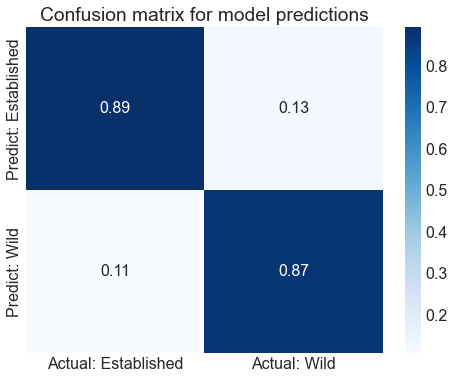

In [14]:
df_cm = pd.DataFrame(confmat, index = ['Predict: Established', 'Predict: Wild'], columns = ['Actual: Established', 'Actual: Wild'])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues")
plt.yticks(va="center")
plt.title('Confusion matrix for model predictions')
plt.savefig('../images/conf_matrix_final.png')

In [95]:
# plot for presentation of model improvement
improvements = pd.read_csv('../data/model_improvements.csv')

In [96]:
improvements['pd_date'] = pd.to_datetime(improvements['combined'])

In [97]:
datetime_index = pd.DatetimeIndex(improvements['pd_date'])
improvements = improvements.set_index(datetime_index)

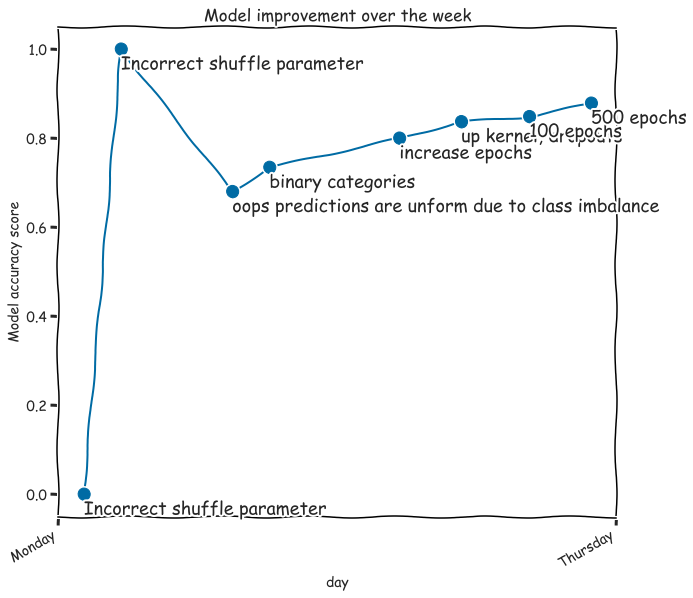

In [98]:
import matplotlib.dates as mdates
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(improvements['pd_date'], improvements['Accuracy'], marker='o', markersize=12)
    ax.set_ylabel('Model accuracy score')
    ax.set_xlabel('day')
    days = mdates.WeekdayLocator(byweekday=(0))
    days_fmt = mdates.DateFormatter('%A')
    
    for i, (x , y) in enumerate(zip(improvements['pd_date'], improvements['Accuracy'])):

        label = improvements['Description'][i]

        # this method is called for each point
        plt.annotate(label, # this is the text
                     (x, y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-20), # distance from text to points (x,y)
                     ha='left',
                    fontsize=18) # horizontal alignment can be left, right or center

#     datemin = mdates[0]
#     datemax = dates[-1]
#     ax.set_xlim(datemin, datemax)
    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_minor_formatter(days_fmt)
    ax.xaxis.set_tick_params(which= 'both')
    ax.set_title('Model improvement over the week')
    fig.autofmt_xdate()
    plt.savefig('../images/model_improvement_plot.png')